In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dish 
### 1. Dataset Overview

In [2]:
dish_df = pd.read_csv('dish.csv')
dish_df.shape

(382941, 37)

In [3]:
dish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382941 entries, 0 to 382940
Data columns (total 37 columns):
index                    382941 non-null int64
dish_id                  382941 non-null int64
kitchen_id               382941 non-null int64
name                     382937 non-null object
price                    382941 non-null int64
volume                   382941 non-null int64
stock                    382941 non-null int64
tomorrow_stock           382941 non-null int64
daily_stock              382941 non-null int64
is_recommend             382941 non-null int64
is_staple                382941 non-null int64
has_staple               382941 non-null int64
staple_type              382941 non-null int64
staple_num               382941 non-null int64
staple_price             382941 non-null int64
old_package              382941 non-null int64
type                     382941 non-null int64
taste                    382941 non-null int64
tags                     53397 non-null ob

In [4]:
# Check Missing values
missing = dish_df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing['missing_ratio'] = missing['missing_count'] / dish_df.shape[0]
missing

,column_name,missing_count,missing_ratio
0,index,0,0.000000
1,dish_id,0,0.000000
2,kitchen_id,0,0.000000
3,name,4,0.000010
4,price,0,0.000000
5,volume,0,0.000000
6,stock,0,0.000000
7,tomorrow_stock,0,0.000000
8,daily_stock,0,0.000000
9,is_recommend,0,0.000000


features with high missing value ratio are not selected, such as tags, description,refusal_ground, materials.

### 2. Checking Features

#### (1). dish name

In [5]:
print('Unique names for dishes is {}'.format(len(dish_df['name'].unique())))

Unique names for dishes is 165288


Dish name could be used for string matching for dish clustering.

#### (2).dish price

In [6]:
dish_df['price'].describe()

count    3.829410e+05
mean     3.785300e+05
std      3.995481e+07
min      0.000000e+00
25%      1.600000e+01
50%      2.000000e+01
75%      2.500000e+01
max      4.294967e+09
Name: price, dtype: float64

In [7]:
print(max(dish_df['price']))
print(min(dish_df['price']))
print(dish_df['price'].mean())
print(dish_df['price'].median())
print(dish_df['price'].std())

4294967295
0
378530.0181150621
20.0
39954808.38309474


In [8]:
# too much outliers, need to remove outliers
dish_df1 = dish_df[(dish_df['price'] > 0) & (dish_df['price'] < 1000)] ## should we remove more outliers?
print('removed {} records'.format(dish_df.shape[0] - dish_df1.shape[0]))

removed 76 records


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 100)

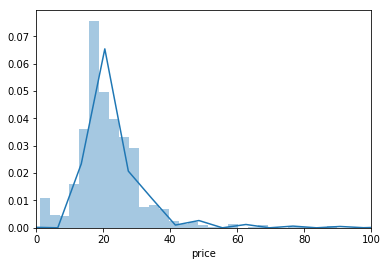

In [9]:
# dish price distribution
sns.distplot(dish_df1['price'],bins=300)
plt.xlim(0, 100)

so most of dishes are under 40, around 10-30.

#### (3). Volume

In [10]:
dish_df1['volume'].value_counts()

0    380284
2      1113
3       886
5       582
Name: volume, dtype: int64

In [11]:
dish_df1.groupby('volume')['price'].agg(['mean','median'])

,mean,median
volume,,
0,22.049602,20
2,48.626235,42
3,71.326185,65
5,112.646048,100


#### dish price goes up as the volume. so volume should be a feature that affect price.

#### (4). Stock

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 40)

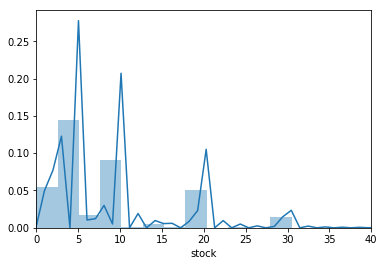

In [12]:
# stock
sns.distplot(dish_df1['stock'], kde=True)
plt.xlim(0, 40)

In [13]:
dish_df1['stock'].corr(dish_df1['price'])

-0.051316022349759564

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


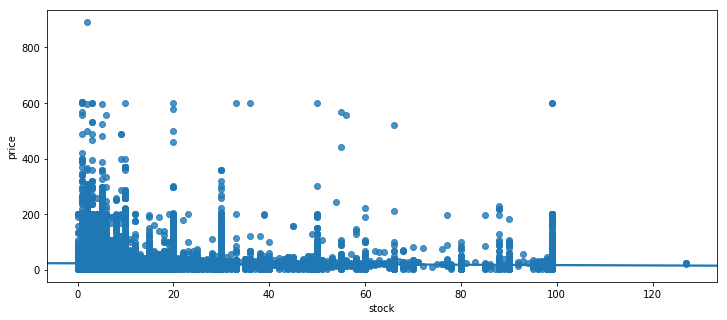

In [14]:
f, ax = plt.subplots(figsize=(12, 5))
sns.regplot(x=dish_df1['stock'], y=dish_df1['price'])

In [15]:
# why all the tomorrow stocks are all 99?
dish_df1['tomorrow_stock'].value_counts()

99    382865
Name: tomorrow_stock, dtype: int64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 40)

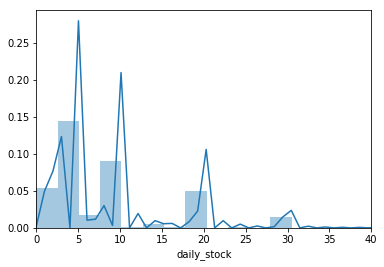

In [16]:
# daily stock
sns.distplot(dish_df1['daily_stock'], kde=True)
plt.xlim(0, 40)

Does not see a pattern here. 
#### Question: Does the stock have any impact on dish price?

#### (5). is recommend

In [17]:
dish_df1['is_recommend'].value_counts()

0    294731
1     88134
Name: is_recommend, dtype: int64

In [18]:
dish_df1.groupby('is_recommend')['price'].agg(['mean','median'])

,mean,median
is_recommend,,
0,21.572410,19
1,25.074648,22


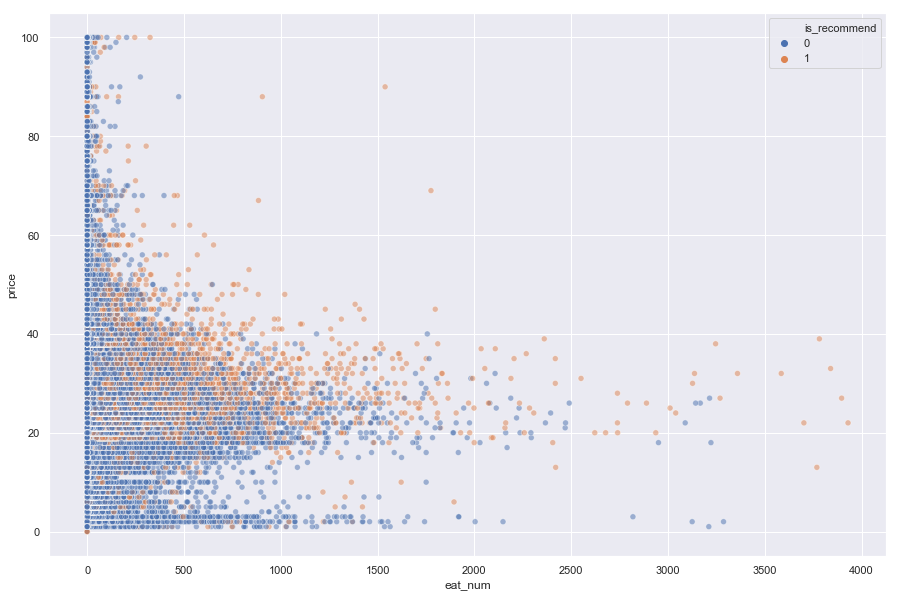

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
df_processed = dish_df[(dish_df['price'] <= 100)&(dish_df['eat_num'] <=4000)]
ax = sns.scatterplot(x="eat_num", y="price", hue="is_recommend", data=df_processed, alpha = 0.5)

#### dish price is higher if it's recommend

#### (6). staple

In [20]:
dish_df1['is_staple'].value_counts()

0    305615
1     77250
Name: is_staple, dtype: int64

In [21]:
dish_df1.groupby('is_staple')['price'].agg(['mean','median'])

,mean,median
is_staple,,
0,22.944136,20
1,20.141294,18


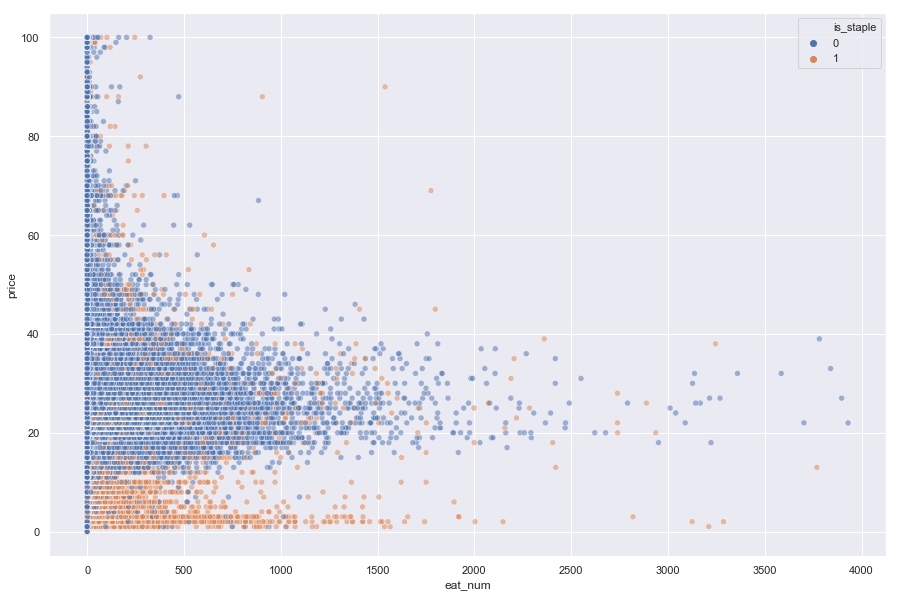

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(x="eat_num", y="price", hue="is_staple", data=df_processed, alpha = 0.5)

In [23]:
dish_df1['has_staple'].value_counts()

1    301603
0     81262
Name: has_staple, dtype: int64

In [24]:
dish_df1.groupby('has_staple')['price'].agg(['mean','median'])

,mean,median
has_staple,,
0,20.311142,18
1,22.935657,20


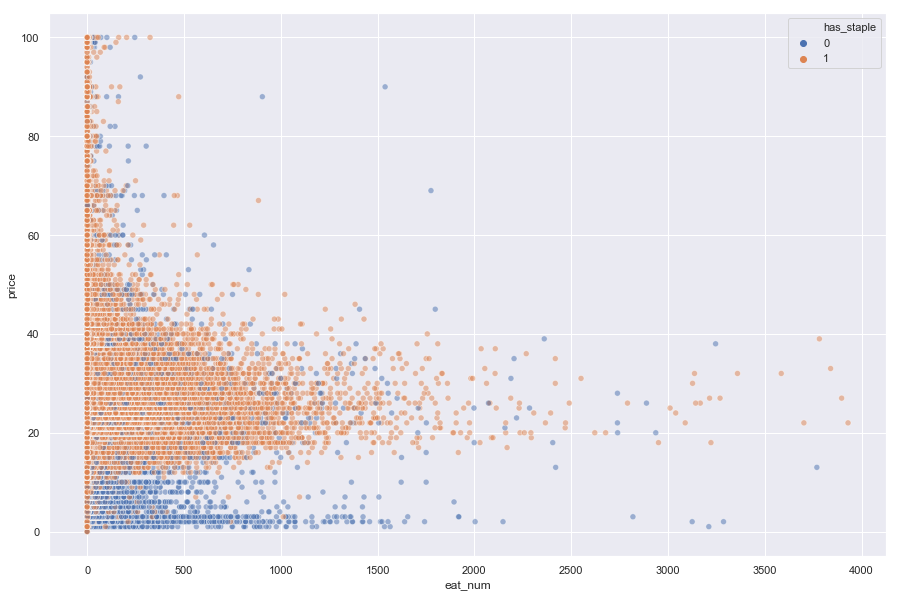

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(x="eat_num", y="price", hue="has_staple", data=df_processed, alpha = 0.5)

In [26]:
# staple type: all rice
dish_df1['staple_type'].value_counts()

1    382865
Name: staple_type, dtype: int64

In [27]:
dish_df1.groupby('staple_num')['price'].agg(['mean','median'])

,mean,median
staple_num,,
0,20.443019,18
1,22.496083,20
2,48.132486,42
3,70.581422,64
5,111.874126,100


In [28]:
#? why staple price is binary
dish_df1['staple_price'].value_counts()

1    377490
0      5375
Name: staple_price, dtype: int64

#### Looks like  'is staple' and 'has staple'  and 'staple number' all have impact on dish price.

#### (7) old package

In [29]:
dish_df1['old_package'].value_counts()

0    382654
1       211
Name: old_package, dtype: int64

In [30]:
dish_df1.groupby('old_package')['price'].agg(['mean','median'])

,mean,median
old_package,,
0,22.374605,20
1,29.644550,18


??? Does it mean something?

#### (8) type

In [31]:
dish_df1['type'].value_counts()

1    301827
4     66124
3      8844
2      2558
5      1792
7       825
6       707
8       187
9         1
Name: type, dtype: int64

In [32]:
dish_df1.groupby('type')['price'].agg(['mean','median'])

,mean,median
type,,
1,22.365216,20
2,70.273651,58
3,22.828019,22
4,20.316617,18
5,19.296317,16
6,50.581330,25
7,21.242424,16
8,24.545455,19
9,39.000000,39


#### (9) taste

In [33]:
dish_df1['taste'].value_counts()

0    289210
1     71902
2     16631
3      4893
4       229
Name: taste, dtype: int64

In [34]:
dish_df1.groupby('taste')['price'].agg(['mean','median'])

,mean,median
taste,,
0,22.315203,20
1,22.801285,19
2,21.093079,19
3,24.096873,22
4,26.393013,23


#### type and test definitely matters.

#### (10) eat number

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 200)

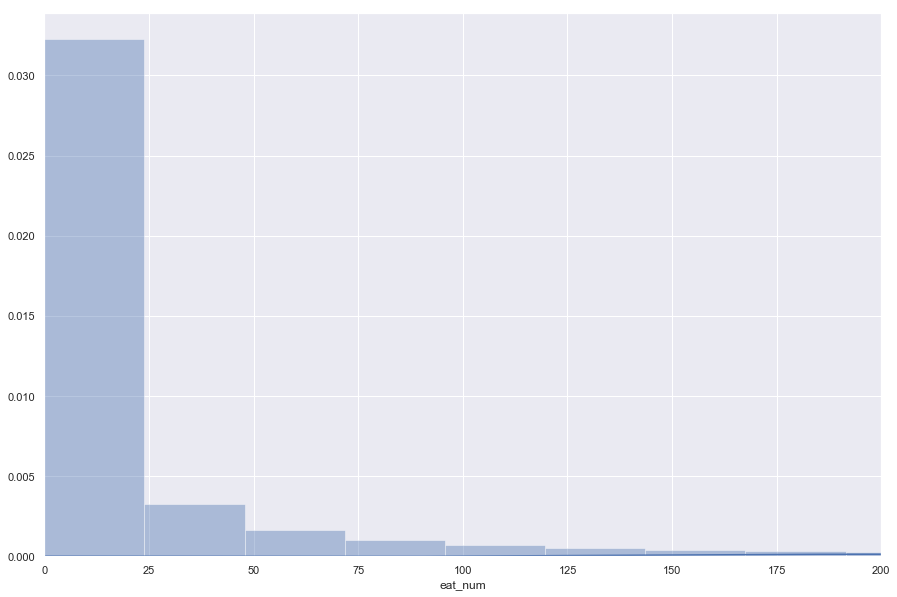

In [35]:
sns.distplot(dish_df1['eat_num'],bins=500, kde=True)
plt.xlim(0, 200)

In [36]:
dish_df1['eat_num'].corr(dish_df1['price'])

0.0017169441840115466

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


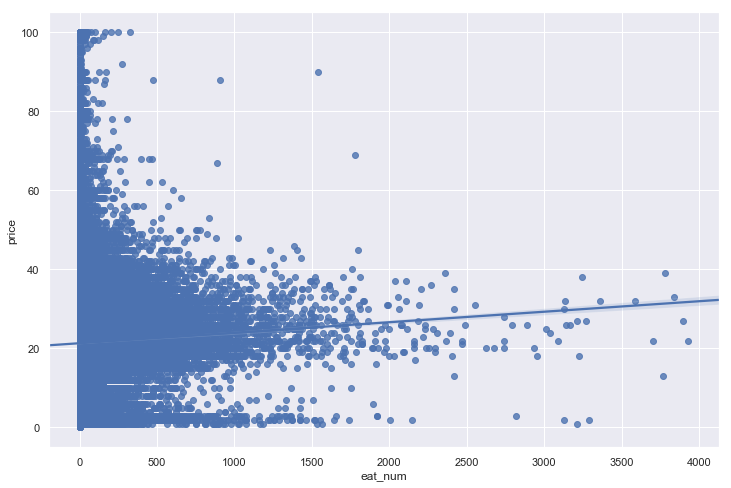

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x= df_processed['eat_num'], y=df_processed['price'])

#### (11) tomorrow only

In [38]:
dish_df1['tmr_only'].value_counts()

0    339241
1     43624
Name: tmr_only, dtype: int64

In [39]:
dish_df1.groupby('tmr_only')['price'].agg(['mean','median'])

,mean,median
tmr_only,,
0,21.280364,20
1,30.919104,24


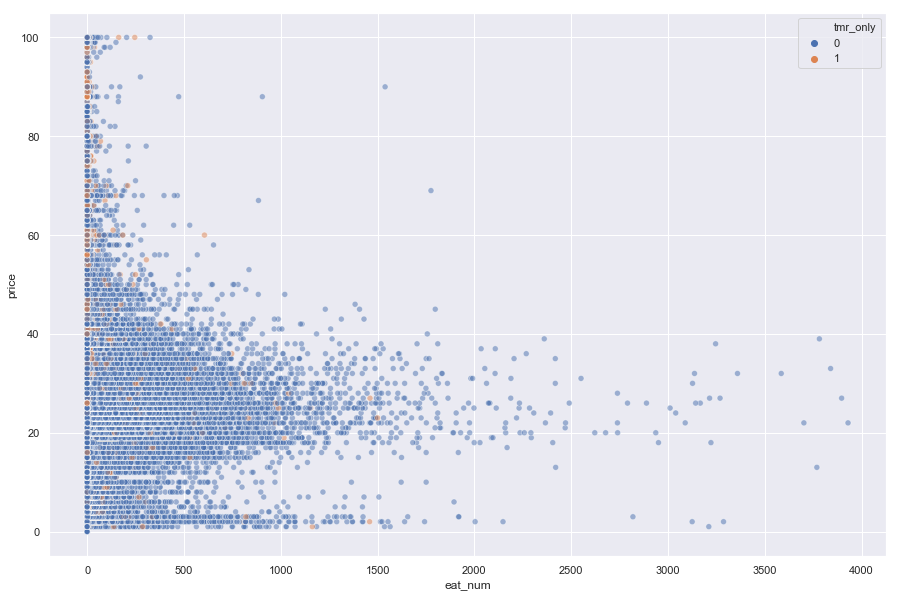

In [40]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(x="eat_num", y="price", hue="tmr_only", data=df_processed, alpha = 0.5)

#### (12) set meal

In [41]:
dish_df1['set_meal'].value_counts()

0.0    370521
1.0     12341
Name: set_meal, dtype: int64

In [42]:
dish_df1.groupby('set_meal')['price'].agg(['mean','median'])

,mean,median
set_meal,,
0.0,22.388345,20
1.0,22.080058,20


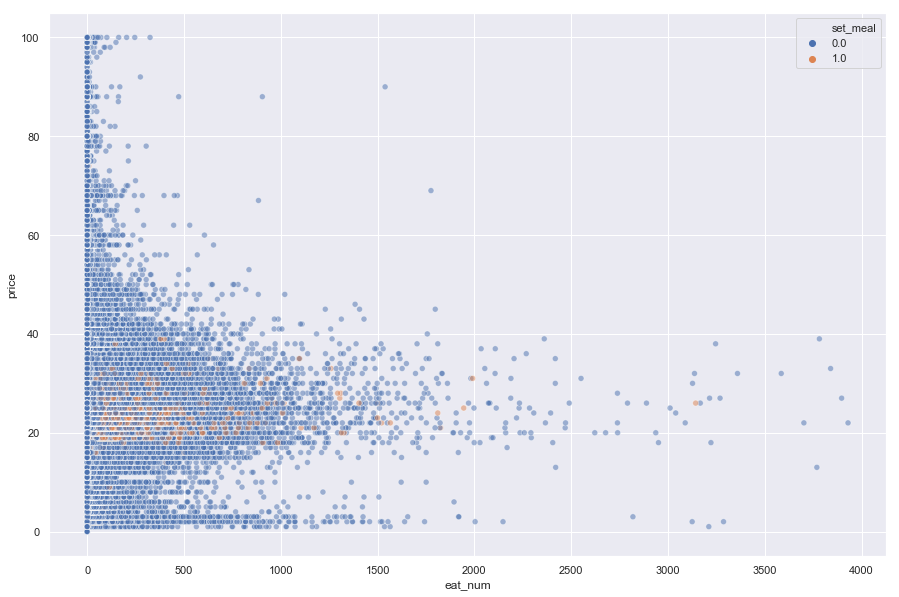

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.scatterplot(x="eat_num", y="price", hue="set_meal", data=df_processed, alpha = 0.5)

#### (13) sequence

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


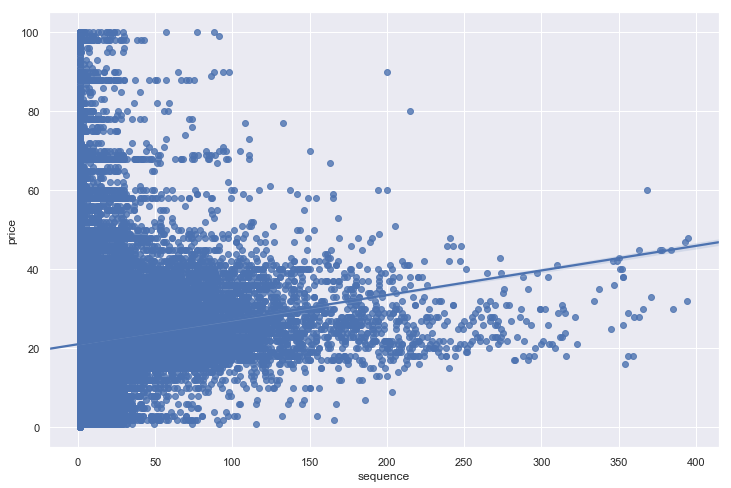

In [44]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x= df_processed['sequence'], y=df_processed['price'])

#### (14) cooking time

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


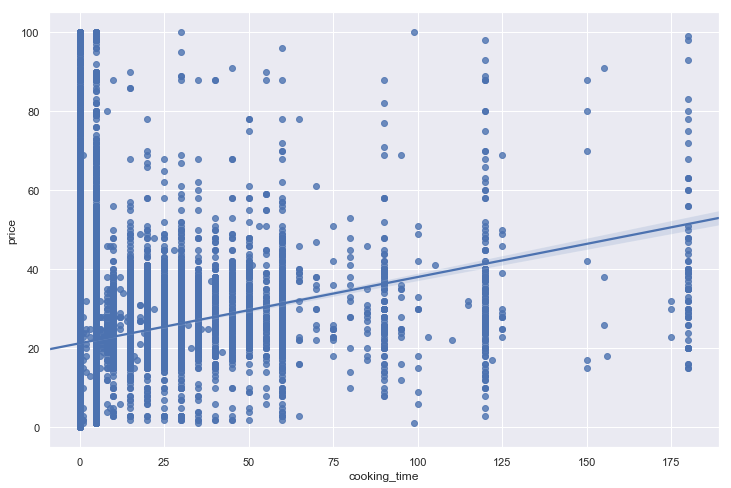

In [45]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x= df_processed['cooking_time'], y=df_processed['price'])

In [49]:
# kitchen id
len(dish_df['kitchen_id'].unique())

16561

In [55]:
dish_df1.groupby('kitchen_id')['price'].agg(['mean','median']).sort_values(by=['mean','median'],ascending=False).head(10)

,mean,median
kitchen_id,,
17877,357.000000,357.0
148532,228.148148,258.0
127428,207.000000,20.0
8291,200.000000,200.0
168397,200.000000,200.0
1671,198.000000,198.0
6128,198.000000,198.0
122732,198.000000,198.0
2631,188.000000,188.0
